In [14]:
import ee
import geemap
import geopandas as gpd
from shapely.ops import transform
from shapely.geometry import Point, Polygon
ee.Initialize()

import pandas as pd

In [15]:
gdf = gpd.read_file("/home/patel_zeel/NDVI_PERG/golvada he 10 2023-24.kml").to_crs(epsg=4326)
gdf = gdf[gdf.index == 0]
def shape_3d_to_2d(shape):
    if shape.has_z:
        return transform(lambda x, y, z: (x, y), shape)
    else:
        return shape
gdf['geometry'] = gdf['geometry'].apply(shape_3d_to_2d)

/tmp/ipykernel_547165/231495633.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_buffer['geometry'] = gdf_buffer.buffer(150)


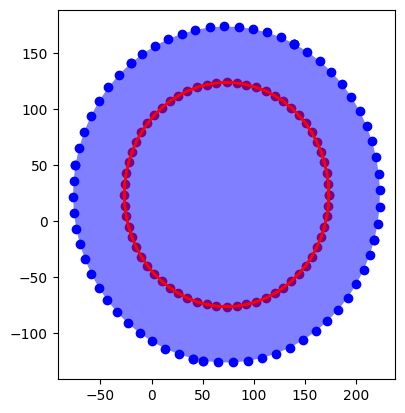

In [16]:
gdf_buffer = gdf.copy()
gdf_buffer['geometry'] = gdf_buffer.buffer(150)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x, y = gdf['geometry'].iloc[0].exterior.xy

# draw radius 100 circle around every point
for xx, yy in zip(x, y):
    circle = Point(xx, yy).buffer(100)
    x, y = circle.exterior.xy
    ax.plot(x, y, color='red', alpha=0.4)

ax.scatter(x, y, color='red')
gdf.plot(ax=ax, color='red', alpha=0.5)
gdf_buffer.plot(ax=ax, color='blue', alpha=0.5)
x, y = gdf_buffer['geometry'].iloc[0].exterior.xy
ax.scatter(x, y, color='blue')

In [17]:
polygon = gdf.geometry.item()
points = list(polygon.exterior.coords)
points

[(73.19791470947145, 24.01977640858627),
 (73.1951165609439, 24.01754094149261),
 (73.1955205367043, 24.01738340683521),
 (73.19480033400262, 24.01523619312771),
 (73.19463695073262, 24.01440311871703),
 (73.19454286010809, 24.0139003560814),
 (73.1942443392165, 24.0126807914708),
 (73.1942341944796, 24.0126863557728),
 (73.19653511275247, 24.01252023885471),
 (73.19648432210984, 24.01217871972386),
 (73.19764861281237, 24.01199930187962),
 (73.1981728693097, 24.01433254741455),
 (73.1986819814156, 24.01611200638915),
 (73.19959745133227, 24.01895266153662),
 (73.19791470947145, 24.01977640858627)]

In [18]:
import numpy as np

In [19]:
import json
json.loads(gdf.to_json())

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'Name': 'kelava 25 he',
    'Description': '<div><b>kelava irrigation he 25&nbsp;</b><br></div><div><b>Year 2022-23</b><br></div>'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[73.19791470947145, 24.01977640858627],
      [73.1951165609439, 24.01754094149261],
      [73.1955205367043, 24.01738340683521],
      [73.19480033400262, 24.01523619312771],
      [73.19463695073262, 24.01440311871703],
      [73.19454286010809, 24.0139003560814],
      [73.1942443392165, 24.0126807914708],
      [73.1942341944796, 24.0126863557728],
      [73.19653511275247, 24.01252023885471],
      [73.19648432210984, 24.01217871972386],
      [73.19764861281237, 24.01199930187962],
      [73.1981728693097, 24.01433254741455],
      [73.1986819814156, 24.01611200638915],
      [73.19959745133227, 24.01895266153662],
      [73.19791470947145, 24.01977640858627]]]}}]}

In [20]:
collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(ee.Geometry(gdf.iloc[0].geometry.__geo_interface__)).filterDate('2020-11-20', '2020-11-30')
collection

In [21]:
# get image with minimum cloud cover
image = collection.sort('CLOUDY_PIXEL_PERCENTAGE').first()

In [26]:
# get number of images in collection
count = collection.size().getInfo()
count

2

In [24]:
# get first image from collection
image = collection.first()

In [33]:
image.addBands([image, image])

In [35]:
image, 26*3

(<ee.image.Image at 0x7f2b2078f070>, 78)

In [13]:
b2 = image.select('B2')
b2

In [19]:
b2.subtract(b2).multiply(b2).add(2.5)

In [23]:
b2.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B2',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [10980, 10980],
   'crs': 'EPSG:32643',
   'crs_transform': [10, 0, 300000, 0, -10, 2700000]}],
 'version': 1729686309598954,
 'id': 'COPERNICUS/S2_SR_HARMONIZED/20200103T054229_20200103T054832_T43QCG',
 'properties': {'DATATAKE_IDENTIFIER': 'GS2B_20200103T054229_014760_N02.13',
  'AOT_RETRIEVAL_ACCURACY': 0,
  'SPACECRAFT_NAME': 'Sentinel-2B',
  'SATURATED_DEFECTIVE_PIXEL_PERCENTAGE': 0,
  'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8A': 228.7554452,
  'CLOUD_SHADOW_PERCENTAGE': 0.198579,
  'MEAN_SOLAR_AZIMUTH_ANGLE': 156.635542399,
  'system:footprint': {'type': 'LinearRing',
   'coordinates': [[74.11016540745601, 24.410902070189405],
    [74.11015304070706, 24.41090268552488],
    [73.02774900042658, 24.400670996155263],
    [73.02770404977073, 24.400633859210657],
    [73.02765432478664, 24.400602059690048],
    [73.02765153226005, 24.40058724

In [15]:
ee_polygon.getInfo()

{'type': 'Polygon',
 'coordinates': [[[-122.52021789550781, 37.76885797689413],
   [-122.51060485839844, 37.76885797689413],
   [-122.51060485839844, 37.77478500000001],
   [-122.52021789550781, 37.77478500000001],
   [-122.52021789550781, 37.76885797689413]]]}

In [12]:
import geemap.foliumap as gee_folium

In [14]:
m = gee_folium.Map()

In [26]:
1/2.75e-05 * 0.2

7272.727272727272

In [15]:
m.addLayer??

Signature:
m.addLayer(
    ee_object,
    vis_params={},
    name='Layer untitled',
    shown=True,
    opacity=1.0,
    **kwargs,
)
Source:   
    def add_layer(
        self,
        ee_object,
        vis_params={},
        name="Layer untitled",
        shown=True,
        opacity=1.0,
        **kwargs,
    ):
        """Adds a given EE object to the map as a layer.

        Args:
            ee_object (Collection|Feature|Image|MapId): The object to add to the map.
            vis_params (dict, optional): The visualization parameters. Defaults to {}.
            name (str, optional): The name of the layer. Defaults to 'Layer untitled'.
            shown (bool, optional): A flag indicating whether the layer should be on by default. Defaults to True.
            opacity (float, optional): The layer's opacity represented as a number between 0 and 1. Defaults to 1.
        """

        layer = EEFoliumTileLayer(ee_object, vis_params, name, shown, opacity, **kwargs)
        layer.add_to

In [5]:
start = "2023-01"
end = "2024-01"
pd.date_range(start, end, freq='MS').strftime("%Y-%m")

Index(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
       '2024-01'],
      dtype='object')

In [6]:
gdf = gpd.read_file("/home/patel_zeel/Mean_NDVI/golvada he 10 2023-24.kml")
gdf = gdf.to_crs(epsg=4326)
def poly_3d_to_2d(shape):
    if shape.has_z:
        return transform(lambda x, y, z: (x, y), shape)
    else:
        return shape
gdf['geometry'] = gdf['geometry'].apply(poly_3d_to_2d)
gdf = gdf.to_crs(epsg=4326)
first_item = gdf.iloc[0].geometry.__geo_interface__
print(first_item)
print(type(first_item))
ee_geometry = ee.Geometry(first_item)
ee_feature_collection = ee.FeatureCollection(ee_geometry)
ee_feature_collection


{'type': 'Polygon', 'coordinates': (((73.19791470947145, 24.01977640858627), (73.1951165609439, 24.01754094149261), (73.1955205367043, 24.01738340683521), (73.19480033400262, 24.01523619312771), (73.19463695073262, 24.01440311871703), (73.19454286010809, 24.0139003560814), (73.1942443392165, 24.0126807914708), (73.1942341944796, 24.0126863557728), (73.19653511275247, 24.01252023885471), (73.19648432210984, 24.01217871972386), (73.19764861281237, 24.01199930187962), (73.1981728693097, 24.01433254741455), (73.1986819814156, 24.01611200638915), (73.19959745133227, 24.01895266153662), (73.19791470947145, 24.01977640858627)),)}
<class 'dict'>


In [7]:
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA').filterBounds(ee_geometry).filterDate('2023-04', '2023-09')
# print image IDs
image_ids = dataset.aggregate_array('system:id').getInfo()
print(image_ids)

# true_color_432 = dataset.select(['B4', 'B3', 'B2'])
# print("Number of images in the collection: ", true_color_432.size().getInfo())

['LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230405', 'LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230421', 'LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230507', 'LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230523', 'LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230608', 'LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230624', 'LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230811', 'LANDSAT/LC08/C02/T1_TOA/LC08_148043_20230827', 'LANDSAT/LC08/C02/T1_TOA/LC08_148044_20230405', 'LANDSAT/LC08/C02/T1_TOA/LC08_148044_20230421', 'LANDSAT/LC08/C02/T1_TOA/LC08_148044_20230507', 'LANDSAT/LC08/C02/T1_TOA/LC08_148044_20230523', 'LANDSAT/LC08/C02/T1_TOA/LC08_148044_20230608', 'LANDSAT/LC08/C02/T1_TOA/LC08_148044_20230811', 'LANDSAT/LC08/C02/T1_TOA/LC08_148044_20230827']


In [136]:
# pick the second image in the collection
image = dataset.toList(true_color_432.size()).get(1)
image = ee.Image(image)
# print image id
print("Image ID: ", image.id().getInfo())
# replace id with "anonymous"
image = image.set('id', 'anonymous')
# print new image id
print("New Image ID: ", image.id().getInfo())

Image ID:  LC08_148044_20230115
New Image ID:  LC08_148044_20230115


In [10]:
geemap.zonal_stats(dataset.qualityMosaic("B4").select(["B4"]), ee_feature_collection, statistics_type='mean', scale=10, return_fc=True).getInfo()

Computing statistics ...


{'type': 'FeatureCollection',
 'columns': {'mean': 'Float', 'system:index': 'String'},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[73.19791470947145, 24.01977640858627],
      [73.1951165609439, 24.01754094149261],
      [73.1955205367043, 24.01738340683521],
      [73.19480033400262, 24.01523619312771],
      [73.19463695073262, 24.01440311871703],
      [73.19454286010809, 24.0139003560814],
      [73.1942443392165, 24.0126807914708],
      [73.1942341944796, 24.0126863557728],
      [73.19653511275247, 24.01252023885471],
      [73.19648432210984, 24.01217871972386],
      [73.19764861281237, 24.01199930187962],
      [73.1981728693097, 24.01433254741455],
      [73.1986819814156, 24.01611200638915],
      [73.19959745133227, 24.01895266153662],
      [73.19791470947145, 24.01977640858627]]]},
   'id': '0',
   'properties': {'mean': 0.7695880858277654}}]}

In [61]:
features.getInfo()['features']

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[73.19791470947145, 24.01977640858627],
     [73.1951165609439, 24.01754094149261],
     [73.1955205367043, 24.01738340683521],
     [73.19480033400262, 24.01523619312771],
     [73.19463695073262, 24.01440311871703],
     [73.19454286010809, 24.0139003560814],
     [73.1942443392165, 24.0126807914708],
     [73.1942341944796, 24.0126863557728],
     [73.19653511275247, 24.01252023885471],
     [73.19648432210984, 24.01217871972386],
     [73.19764861281237, 24.01199930187962],
     [73.1981728693097, 24.01433254741455],
     [73.1986819814156, 24.01611200638915],
     [73.19959745133227, 24.01895266153662],
     [73.19791470947145, 24.01977640858627]]]},
  'id': '0',
  'properties': {'mean': 0.7695880858277654}}]

In [69]:
import re

re.findall(r"LC08_\d+_(\d+)_NDVI", "LC08_148043_20210125_NDVI")[0]

'20210125'

In [72]:
dataset.qualityMosaic('NDVI')

In [116]:
start = '2023-01-01'
start.format("YYYY-MM")

'2023-01-01'

In [110]:
import pandas as pd
start_date = '2023-01'
end_date = '2024-01'

# get 1st day of each month
dates = pd.date_range(start_date, end_date, freq='MS').strftime("%Y-%m-%d").tolist()
print(dates)

['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01']


In [138]:
geemap.zonal_stats??

Signature:
geemap.zonal_stats(
    in_value_raster,
    in_zone_vector,
    out_file_path=None,
    stat_type='MEAN',
    scale=None,
    crs=None,
    tile_scale=1.0,
    return_fc=False,
    verbose=True,
    timeout=300,
    proxies=None,
    **kwargs,
)
Source:   
def zonal_stats(
    in_value_raster,
    in_zone_vector,
    out_file_path=None,
    stat_type="MEAN",
    scale=None,
    crs=None,
    tile_scale=1.0,
    return_fc=False,
    verbose=True,
    timeout=300,
    proxies=None,
    **kwargs,
):
    """Summarizes the values of a raster within the zones of another dataset and exports the results as a csv, shp, json, kml, or kmz.

    Args:
        in_value_raster (object): An ee.Image or ee.ImageCollection that contains the values on which to calculate a statistic.
        in_zone_vector (object): An ee.FeatureCollection that defines the zones.
        out_file_path (str): Output file path that will contain the summary of the values in each zone. The file type can be: csv, 

In [139]:
import pandas as pd

In [140]:
pd.merge??

Signature:
pd.merge(
    left: 'DataFrame | Series',
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where

In [163]:
first_item
ee_object = geemap.gdf_to_ee(first_item)
image = dataset.toList(true_color_432.size()).get(1)
image = ee.Image(image)
image

In [232]:
import geemap
Map = geemap.Map(center=(27.0, 72.0), zoom=17)

wmts_url = "https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/MapServer/WMTS/1.0.0"

Map.add_tile_layer("https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/default028mm/MapServer/tile/56450/{z}/{y}/{x}")
Map

Map(center=[27.0, 72.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

In [249]:
import geemap.foliumap as geemap
Map = geemap.Map(center=(27.0, 72.0), zoom=17)

wmts_url = "https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/MapServer/WMTS/1.0.0"

Map.add_tile_layer("https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/56450/{z}/{y}/{x}")
Map

In [268]:
import leafmap
Map = leafmap.Map(center=(27.0, 72.0), zoom=17)
Map.split_map("https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/10/{z}/{y}/{x}", "https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/56450/{z}/{y}/{x}")
Map

Map(center=[27.0, 72.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [277]:
import leafmap.leafmap as leafmap

layers = ["ROADMAP", "HYBRID"]
leafmap.linked_maps(rows=1, cols=2, height="400px", layers=layers)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [204]:
import xml.etree.ElementTree as ET
import requests

# WMTS capabilities URL
wmts_url = "https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/MapServer/WMTS/1.0.0/WMTSCapabilities.xml"

# Get the XML content
response = requests.get(wmts_url)
root = ET.fromstring(response.content)

In [208]:
import xml.etree.ElementTree as ET
import requests

# WMTS capabilities URL
wmts_url = "https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/MapServer/WMTS/1.0.0/WMTSCapabilities.xml"

# Fetch the XML content
response = requests.get(wmts_url)
root = ET.fromstring(response.content)

# Define namespaces
namespace = {
    'wmts': 'https://www.opengis.net/wmts/1.0',
    'ows': 'https://www.opengis.net/ows/1.1'
}

# Extract mapping of layer identifiers to their ResourceURL templates
layer_mapping = {}

# Find all Layer elements
for layer in root.findall('.//wmts:Layer', namespace):
    identifier = layer.find('ows:Identifier', namespace).text
    title = layer.find('ows:Title', namespace).text
    resource_url_elem = layer.find('wmts:ResourceURL', namespace)

    if resource_url_elem is not None:
        resource_template = resource_url_elem.get('template')
        layer_mapping[identifier] = {
            'title': title,
            'resource_template': resource_template
        }

# Display the extracted layer mapping
print(f"Number of layers: {len(layer_mapping)}")

Number of layers: 175


In [240]:
from tqdm.notebook import tqdm
import re
map_dict = {}
for layer_id, details in tqdm(layer_mapping.items()):
    # print(f"Identifier: {layer_id}")
    # print(f"Title: {details['title']}")
    # print(f"Resource Template: {details['resource_template']}")
    date = re.findall(f"World Imagery \(Wayback (.*)\)", details['title'])[0]
    url = details['resource_template']
    url = url.replace("{TileMatrixSet}", "GoogleMapsCompatible")
    url = url.replace("{TileMatrix}", "{z}")
    url = url.replace("{TileRow}", "{y}")
    url = url.replace("{TileCol}", "{x}")
    map_dict[date] = url

import json
with open("wayback_imagery.json", "w") as f:
    json.dump(map_dict, f)

  0%|          | 0/175 [00:00<?, ?it/s]

In [264]:
map_dict

{'2024-10-10': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/56450/{z}/{y}/{x}',
 '2024-09-19': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/20337/{z}/{y}/{x}',
 '2024-08-15': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/32553/{z}/{y}/{x}',
 '2024-06-27': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/39767/{z}/{y}/{x}',
 '2024-06-06': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/12428/{z}/{y}/{x}',
 '2024-05-09': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/GoogleMapsCompatible/MapServer/tile/52930/{z}/{y}/{x}',
 '2024-03-28': 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/Wor

In [2]:
import leafmap.leafmap as leafmap

layers = ["Esri.WorldTopoMap", "OpenTopoMap"]
leafmap.linked_maps(rows=1, cols=2, height="400px", layers=layers)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [1]:
from ipyleaflet import Map, TileLayer, WidgetControl
from ipywidgets import SelectionSlider

# Prepare a slider widget to navigate the version history of the basemap
# There doesn't seem to be any pattern between timeId and basemap date, so just a few couples manually extracted from
# https://wayback.maptiles.arcgis.com/arcgis/rest/services/world_imagery/mapserver/wmts/1.0.0/wmtscapabilities.xml
date_timeId_mapping = [('2016-01-13', 3515),
                       ('2017-01-11', 577),
                       ('2018-01-08', 13161),
                       ('2019-01-09', 6036),
                       ('2020-01-08', 23001),
                       ('2021-01-13', 1049),
                       ('2022-01-12', 42663),
                       ('2023-01-11', 11475)]

# Date slider widget
wayback_slider = SelectionSlider(
    options=date_timeId_mapping,
    value=3515,
    description='Date',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True
)
time_control = WidgetControl(widget=wayback_slider, position='topright')

# Connect tile layer (wayback, not yet defined) with slider value
def on_date_change(*args):
    wayback.url = 'https://wayback.maptiles.arcgis.com/arcgis/rest/services/world_imagery/wmts/1.0.0/default028mm/mapserver/tile/%d/{z}/{y}/{x}' % wayback_slider.value
    wayback.redraw()
    
wayback_slider.observe(on_date_change, 'value')

# Prepare map, tilelayer and draw it
m = Map(center=(45.8107, 8.6288), zoom=16, scroll_wheel_zoom=True)
wayback = TileLayer(url='https://wayback.maptiles.arcgis.com/arcgis/rest/services/world_imagery/wmts/1.0.0/default028mm/mapserver/tile/3515/{z}/{y}/{x}')
m.add_layer(wayback)
m.add_control(time_control)
m

Map(center=[45.8107, 8.6288], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…